In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
x_values=pd.read_excel("x_values.xlsx")
x_values=x_values[["단지명","거리_미터","브랜드","전체층수"]]
x_values.head()

단지명  거리_미터  브랜드  전체층수
0  공덕1삼성래미안    235    1    25
1  공덕2삼성래미안    408    1    20
2  공덕3삼성래미안    417    1    20
3      공덕현대    614    0    15
4     두영이지안    598    0     9

## 2011-2020 마포구 OLS

In [3]:
########################################

In [23]:
def OLS(i):
    mapo=pd.read_excel("mapo_20"+str(i)+".xlsx")
    t=pd.merge(mapo,x_values,on="단지명",how='left')
    t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
    t["상대층수"]=t["층"]/t["전체층수"]
    t["역세권"]= (t["거리_미터"] <= 500).astype(int)
    t["전용면적_제곱"] = t["전용면적(㎡)"] ** 2
    t["평"]=(t["전용면적(㎡)"]/3.3).round(2)
    t["평당가격"]=t["거래금액(만원)"]/t["평"].round(2)
    date=[str(i)[:4]+"-"+str(i)[4:] for i in t.계약년월]
    t["date"]=pd.to_datetime(date).to_period(freq='M')
    a=pd.DataFrame(t["평당가격"].groupby(t['date']).mean())
    a.columns=["월별_평당가격"]
    f=pd.merge(t,a.shift(),on="date",how='left')
    x=f[["전용면적(㎡)","전용면적_제곱","건축년도","역세권","브랜드","층","월별_평당가격","시군구"]]
    x=pd.get_dummies(x)
    x=sm.add_constant(x)
    y=t[["거래금액(만원)"]]
    model=sm.OLS(y,x, missing="drop")
    results=model.fit()
    #results=model.fit(cov_type="HC1")
    return results

In [24]:
#######################################

In [25]:
OLS(11).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     253.4
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:42:17   Log-Likelihood:                -16078.
No. Observations:                1558   AIC:                         3.222e+04
Df Residuals:                    1527   BIC:                         3.238e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.642e+05   6.75e+04     -3.912      0.000   -3.97e+05   -1.32e+05
전용면적(㎡)              187.4686     37.493      5.000      0.000     113.925     261.013
전용면적_제곱                1.9731      0.200      9.844      0.000       1.580       2.366
건축년도                 140.1270     34.798      4.027      0.000      71.869     208.385
역세권                 2822.7268    483.023      5.844      0.000    1875.269    3770.185
브랜드                 5467.8332    656.942      8.323      0.000    4179.229    6756.437
층                    383.9868     34.124     11.253      0.000     317.051     450.922
월별_평당가격                3.4868      4.456      0.783      0.434      -5.253      12.227
시군구_서울특별시 마포구 공덕동  -5646.3197   2945.956     -1.917      0.055   -1.14e+04     132.228
시군구_서울특별시 마포구 노고산동 -1.655e+04   3369.739     -4.911      0.000   -2.32e+04   -9937.401
시군구_서울특별시 마포구 대흥동  -1.127e+04   2992.901     -3.766      0.000   -1.71e+04   -5400.692
시군구_서울특별시 마포구 도화동  -1.263e+04   2796.908     -4.514      0.000   -1.81e+04   -7139.058
시군구_서울특별시 마포구 동교동  -1.533e+04   7685.166     -1.995      0.046   -3.04e+04    -254.328
시군구_서울특별시 마포구 마포동  -1.685e+04   3625.309     -4.647      0.000    -2.4e+04   -9734.951
시군구_서울특별시 마포구 망원동  -1.883e+04   2991.415     -6.293      0.000   -2.47e+04    -1.3e+04
시군구_서울특별시 마포구 상수동  -8337.1042   3505.580     -2.378      0.018   -1.52e+04   -1460.842
시군구_서울특별시 마포구 상암동   3928.5032   3024.625      1.299      0.194   -2004.356    9861.363
시군구_서울특별시 마포구 서교동  -1.618e+04   3173.900     -5.098      0.000   -2.24e+04   -9955.279
시군구_서울특별시 마포구 성산동  -1.189e+04   2713.869     -4.380      0.000   -1.72e+04   -6562.428
시군구_서울특별시 마포구 신공덕동 -1.197e+04   3004.577     -3.983      0.000   -1.79e+04   -6074.030
시군구_서울특별시 마포구 신수동  -1.341e+04   3002.108     -4.466      0.000   -1.93e+04   -7519.303
시군구_서울특별시 마포구 신정동  -1.281e+04   3228.333     -3.969      0.000   -1.91e+04   -6479.564
시군구_서울특별시 마포구 아현동  -1.785e+04   3211.685     -5.557      0.000   -2.41e+04   -1.15e+04
시군구_서울특별시 마포구 연남동  -1.797e+04   2943.885     -6.105      0.000   -2.37e+04   -1.22e+04
시군구_서울특별시 마포구 염리동  -9997.8275   2918.074     -3.426      0.001   -1.57e+04   -4273.970
시군구_서울특별시 마포구 용강동  -6634.0412   3093.424     -2.145      0.032   -1.27e+04    -566.231
시군구_서울특별시 마포구 중동   -1.514e+04   2961.910     -5.110      0.000   -2.09e+04   -9326.079
시군구_서울특별시 마포구 창전동  -6560.6375   2969.756     -2.209      0.027   -1.24e+04    -735.406
시군구_서울특별시 마포구 토정동  -5537.5915   3406.419     -1.626      0.104   -1.22e+04    1144.162
시군구_서울특별시 마포구 하중동   6789.0065   3259.142      2.083      0.037     396.139    1.32e+04
시군구_서울특별시 마포구 합정동  -1.411e+04   3756.003     -3.756      0.000   -2.15e+04   -6741.557
시군구_서울특별시 마포구 현석동  -9412.0955   3018.280     -3.118      0.002   -1.53e+04   -3491.683
======================================

In [22]:
OLS(11).resid.plot(kind="kde")

In [21]:
OLS(12)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     310.7
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:56:47   Log-Likelihood:                -16001.
No. Observations:                1486   AIC:                         3.206e+04
Df Residuals:                    1456   BIC:                         3.222e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.066e+06   1.11e+05     -9.644      0.000   -1.28e+06   -8.49e+05
전용면적(㎡)              393.4651     45.720      8.606      0.000     303.782     483.148
전용면적_제곱                1.4040      0.231      6.085      0.000       0.951       1.857
건축년도                 553.5616     57.747      9.586      0.000     440.286     666.837
역세권                 8658.3423    788.068     10.987      0.000    7112.473    1.02e+04
브랜드                 1.025e+04    990.226     10.350      0.000    8306.489    1.22e+04
상대층수                1385.7502   1181.319      1.173      0.241    -931.520    3703.020
시군구_서울특별시 마포구 공덕동  -4.428e+04   4793.032     -9.238      0.000   -5.37e+04   -3.49e+04
시군구_서울특별시 마포구 노고산동 -4.622e+04   5411.335     -8.541      0.000   -5.68e+04   -3.56e+04
시군구_서울특별시 마포구 대흥동    -4.6e+04   4867.910     -9.449      0.000   -5.55e+04   -3.64e+04
시군구_서울특별시 마포구 도화동  -4.622e+04   4612.704    -10.020      0.000   -5.53e+04   -3.72e+04
시군구_서울특별시 마포구 동교동  -7.867e+04   7902.597     -9.955      0.000   -9.42e+04   -6.32e+04
시군구_서울특별시 마포구 마포동  -5.077e+04   5880.937     -8.634      0.000   -6.23e+04   -3.92e+04
시군구_서울특별시 마포구 망원동  -5.098e+04   4863.375    -10.482      0.000   -6.05e+04   -4.14e+04
시군구_서울특별시 마포구 상수동  -4.885e+04   5934.156     -8.232      0.000   -6.05e+04   -3.72e+04
시군구_서울특별시 마포구 상암동   -3.09e+04   4934.768     -6.261      0.000   -4.06e+04   -2.12e+04
시군구_서울특별시 마포구 서교동    -1.4e+04   5129.256     -2.729      0.006   -2.41e+04   -3933.943
시군구_서울특별시 마포구 성산동  -4.077e+04   4278.960     -9.529      0.000   -4.92e+04   -3.24e+04
시군구_서울특별시 마포구 신공덕동 -3.896e+04   5036.647     -7.736      0.000   -4.88e+04   -2.91e+04
시군구_서울특별시 마포구 신수동  -4.696e+04   4922.531     -9.540      0.000   -5.66e+04   -3.73e+04
시군구_서울특별시 마포구 신정동  -4.887e+04   5386.207     -9.072      0.000   -5.94e+04   -3.83e+04
시군구_서울특별시 마포구 아현동  -5.232e+04   5543.909     -9.437      0.000   -6.32e+04   -4.14e+04
시군구_서울특별시 마포구 연남동  -5.257e+04   5005.082    -10.503      0.000   -6.24e+04   -4.28e+04
시군구_서울특별시 마포구 염리동   -4.33e+04   4846.254     -8.936      0.000   -5.28e+04   -3.38e+04
시군구_서울특별시 마포구 용강동  -4.325e+04   4965.714     -8.709      0.000    -5.3e+04   -3.35e+04
시군구_서울특별시 마포구 중동   -4.813e+04   4793.371    -10.041      0.000   -5.75e+04   -3.87e+04
시군구_서울특별시 마포구 창전동  -4.761e+04   4873.109     -9.769      0.000   -5.72e+04    -3.8e+04
시군구_서울특별시 마포구 토정동  -2.998e+04   5915.330     -5.069      0.000   -4.16e+04   -1.84e+04
시군구_서울특별시 마포구 하중동   -2.76e+04   5832.356     -4.732      0.000    -3.9e+04   -1.62e+04
시군구_서울특별시 마포구 합정동   -4.63e+04   6019.513     -7.692      0.000   -5.81e+04   -3.45e+04
시군구_서울특별시 마포구 현석동  -4.238e+04   5206.905     -8.140      0.000   -5.26e+04   -3.22e+04
==============================================================================
Omnibus:                      346.813   Durbin

In [22]:
OLS(13)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     873.2
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:56:52   Log-Likelihood:                -26986.
No. Observations:                2520   AIC:                         5.403e+04
Df Residuals:                    2490   BIC:                         5.421e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.259e+05   7.42e+04     -8.441      0.000   -7.71e+05   -4.81e+05
전용면적(㎡)               -3.3037     45.385     -0.073      0.942     -92.301      85.693
전용면적_제곱                3.6703      0.255     14.400      0.000       3.171       4.170
건축년도                 332.2774     38.558      8.618      0.000     256.669     407.886
역세권                 5592.4973    573.517      9.751      0.000    4467.878    6717.116
브랜드                 1.227e+04    775.238     15.828      0.000    1.08e+04    1.38e+04
상대층수                4213.6824    787.793      5.349      0.000    2668.886    5758.479
시군구_서울특별시 마포구 공덕동  -2.542e+04   3186.481     -7.976      0.000   -3.17e+04   -1.92e+04
시군구_서울특별시 마포구 노고산동  -2.92e+04   3974.970     -7.347      0.000    -3.7e+04   -2.14e+04
시군구_서울특별시 마포구 대흥동  -2.584e+04   3290.310     -7.855      0.000   -3.23e+04   -1.94e+04
시군구_서울특별시 마포구 도화동  -2.757e+04   3117.980     -8.843      0.000   -3.37e+04   -2.15e+04
시군구_서울특별시 마포구 동교동  -4.233e+04   8041.318     -5.264      0.000   -5.81e+04   -2.66e+04
시군구_서울특별시 마포구 마포동  -3.555e+04   3745.175     -9.492      0.000   -4.29e+04   -2.82e+04
시군구_서울특별시 마포구 망원동  -3.049e+04   3304.391     -9.228      0.000    -3.7e+04    -2.4e+04
시군구_서울특별시 마포구 상수동  -3.775e+04   4845.487     -7.791      0.000   -4.73e+04   -2.82e+04
시군구_서울특별시 마포구 상암동  -1.149e+04   3403.723     -3.375      0.001   -1.82e+04   -4814.122
시군구_서울특별시 마포구 서교동   1.218e+04   3414.390      3.567      0.000    5482.381    1.89e+04
시군구_서울특별시 마포구 성산동   -2.61e+04   2964.103     -8.807      0.000   -3.19e+04   -2.03e+04
시군구_서울특별시 마포구 신공덕동 -2.662e+04   3302.350     -8.062      0.000   -3.31e+04   -2.01e+04
시군구_서울특별시 마포구 신수동  -2.579e+04   3418.732     -7.545      0.000   -3.25e+04   -1.91e+04
시군구_서울특별시 마포구 신정동  -2.563e+04   3516.242     -7.290      0.000   -3.25e+04   -1.87e+04
시군구_서울특별시 마포구 아현동  -3.352e+04   3840.297     -8.728      0.000    -4.1e+04    -2.6e+04
시군구_서울특별시 마포구 연남동  -3.323e+04   3335.258     -9.962      0.000   -3.98e+04   -2.67e+04
시군구_서울특별시 마포구 염리동  -2.694e+04   3285.368     -8.199      0.000   -3.34e+04   -2.05e+04
시군구_서울특별시 마포구 용강동  -2.702e+04   3620.674     -7.463      0.000   -3.41e+04   -1.99e+04
시군구_서울특별시 마포구 중동   -2.719e+04   3330.328     -8.163      0.000   -3.37e+04   -2.07e+04
시군구_서울특별시 마포구 창전동  -2.664e+04   3280.449     -8.120      0.000   -3.31e+04   -2.02e+04
시군구_서울특별시 마포구 토정동   -1.62e+04   3601.996     -4.499      0.000   -2.33e+04   -9141.567
시군구_서울특별시 마포구 하중동  -2.281e+04   4414.034     -5.168      0.000   -3.15e+04   -1.42e+04
시군구_서울특별시 마포구 합정동  -2.786e+04   3938.649     -7.073      0.000   -3.56e+04   -2.01e+04
시군구_서울특별시 마포구 현석동  -2.692e+04   3446.863     -7.809      0.000   -3.37e+04   -2.02e+04
==============================================================================
Omnibus:                      751.240   Durbin

In [23]:
mapo_2013=pd.read_excel("mapo_2013.xlsx")
t=pd.merge(mapo_2013,x_values,on="단지명",how='left')
t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
t["상대층수"]=t["층"]/t["전체층수"]
t["역세권"]= (t["거리_미터"] <= 500).astype(int)
t["역세권"]

0       1
1       1
2       1
3       1
4       1
       ..
2515    1
2516    0
2517    1
2518    0
2519    1
Name: 역세권, Length: 2520, dtype: int32

In [24]:
t_no_brand = t["브랜드"] == 0
no_brand = t[t_no_brand]
no_brand = no_brand.sort_values(by="거래금액(만원)", ascending=False)
no_brand.head(50)

시군구     번지    본번  부번          단지명   전용면적(㎡)    계약년월  계약일  \
1033   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  139.9800  201310    2   
1800  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  152.8500  201303   13   
1037   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  139.9800  201311   26   
2493   서울특별시 마포구 현석동    223   223   0    반도유보라아일랜드  125.7354  201306   25   
1032   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  118.5900  201308    6   
1030   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  118.5900  201305   13   
1031   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  118.5900  201305   16   
1944   서울특별시 마포구 신정동  27030    74   1       씨제이리버힐  195.5800  201302   25   
1809  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201308   14   
1808  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201308    9   
1803  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201306   13   
1816  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201310    8   
1815  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201310    8   
1814  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201310    7   
1036   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  118.3500  201311   24   
1029   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  118.5900  201305    6   
1813  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201310    2   
1804  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201306   21   
772    서울특별시 마포구 상수동    394   394   0       신구강변연가  152.3360  201302   14   
1811  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201309    9   
1802  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201306   13   
1805  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201306   26   
2092   서울특별시 마포구 용강동    500   500   0        마포대림1  131.8500  201309   10   
946    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201301   27   
1806  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0800  201307   17   
1798  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201301   18   
2089   서울특별시 마포구 용강동    500   500   0        마포대림1  131.8500  201305   30   
2088   서울특별시 마포구 용강동    500   500   0        마포대림1  131.8500  201302   20   
428    서울특별시 마포구 도화동    550   550   0           삼성  136.1000  201305   20   
486    서울특별시 마포구 도화동    555   555   0      한화오벨리스크  125.1200  201305   23   
2241   서울특별시 마포구 창전동    444   444   0         서강예가  119.3010  201301   19   
1028   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식   84.7800  201301   18   
771    서울특별시 마포구 상수동    395   395   0      밤섬리버베르빌  174.3190  201303   28   
910    서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201307   21   
900    서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201304   30   
1817  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201310   24   
961    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201305   18   
885    서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201301   14   
1797  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  103.0400  201301   10   
893    서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201303   20   
798    서울특별시 마포구 상암동   1743  1743   0  상암월드컵파크12단지  114.7200  201306    4   
948    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201302   25   
972    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201312    6   
953    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201303   20   
971    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201311   20   
794    서울특별시 마포구 상암동   1743  1743   0  상암월드컵파크12단지  114.7200  201305    6   
1807  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  103.0400  201307   18   
967    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201310    1   
949    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201303    3   
970    서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201311    2   

      거래금액(만원)   층  건축년도          도로명  거리_미터  브랜드  전체층수      상대층수  역세권  
1033    129000  

In [25]:
t_brand = t["브랜드"] == 1
brand = t[t_brand]
brand

시군구   번지   본번  부번       단지명  전용면적(㎡)    계약년월  계약일  거래금액(만원)  \
0     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    84.94  201301   23     51500   
1     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    59.74  201302    6     38900   
2     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    84.94  201302    6     50500   
3     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    84.94  201302   18     51200   
4     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    59.74  201302   18     37300   
...             ...  ...  ...  ..       ...      ...     ...  ...       ...   
2515  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201306   17     45000   
2516  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201311    9     42700   
2517  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201311    9     42700   
2518  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201311    9     42700   
2519  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201311    9     42700   

       층  건축년도         도로명  거리_미터  브랜드  전체층수  상대층수  역세권  
0     22  1999  마포대로 115-8    235    1    25  0.88    1  
1     21  1999  마포대로 115-8    235    1    25  0.84    1  
2      7  1999  마포대로 115-8    235    1    25  0.28    1  
3     23  1999  마포대로 115-8    235    1    25  0.92    1  
4      3  1999  마포대로 115-8    235    1    25  0.12    1  
...   ..   ...         ...    ...  ...   ...   ...  ...  
2515  25  1999    신수로3길 23    246    1    25  1.00    1  
2516   9  1999    신수로3길 23    754    1    25  0.36    0  
2517   9  1999    신수로3길 23    246    1    25  0.36    1  
2518   9  1999    신수로3길 23    754    1    25  0.36    0  
2519   9  1999    신수로3길 23    246    1    25  0.36    1  

[755 rows x 17 columns]

In [26]:
OLS(14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     294.4
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:56:56   Log-Likelihood:                -29610.
No. Observations:                2832   AIC:                         5.928e+04
Df Residuals:                    2802   BIC:                         5.946e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.298e+05   5.59e+04    -16.629      0.000   -1.04e+06    -8.2e+05
전용면적(㎡)              431.6706     32.592     13.245      0.000     367.764     495.578
전용면적_제곱                0.3222      0.185      1.741      0.082      -0.041       0.685
건축년도                 486.6784     29.151     16.695      0.000     429.518     543.838
역세권                 3139.5283    405.697      7.739      0.000    2344.033    3935.024
브랜드                 7188.4304    539.646     13.321      0.000    6130.287    8246.574
상대층수                3927.9534    592.223      6.633      0.000    2766.715    5089.191
시군구_서울특별시 마포구 공덕동  -3.712e+04   2406.237    -15.428      0.000   -4.18e+04   -3.24e+04
시군구_서울특별시 마포구 노고산동 -4.229e+04   2807.614    -15.063      0.000   -4.78e+04   -3.68e+04
시군구_서울특별시 마포구 대흥동  -3.882e+04   2479.591    -15.655      0.000   -4.37e+04    -3.4e+04
시군구_서울특별시 마포구 도화동  -4.207e+04   2331.625    -18.045      0.000   -4.66e+04   -3.75e+04
시군구_서울특별시 마포구 동교동  -5.072e+04   8476.781     -5.984      0.000   -6.73e+04   -3.41e+04
시군구_서울특별시 마포구 마포동   -4.32e+04   2956.132    -14.615      0.000    -4.9e+04   -3.74e+04
시군구_서울특별시 마포구 망원동  -4.585e+04   2484.152    -18.457      0.000   -5.07e+04    -4.1e+04
시군구_서울특별시 마포구 상수동  -4.075e+04   3037.281    -13.418      0.000   -4.67e+04   -3.48e+04
시군구_서울특별시 마포구 상암동  -2.826e+04   2565.283    -11.014      0.000   -3.33e+04   -2.32e+04
시군구_서울특별시 마포구 서교동  -3.273e+04   2657.706    -12.315      0.000   -3.79e+04   -2.75e+04
시군구_서울특별시 마포구 성산동   -3.69e+04   2224.360    -16.587      0.000   -4.13e+04   -3.25e+04
시군구_서울특별시 마포구 신공덕동 -3.869e+04   2470.688    -15.660      0.000   -4.35e+04   -3.38e+04
시군구_서울특별시 마포구 신수동  -4.169e+04   2564.596    -16.255      0.000   -4.67e+04   -3.67e+04
시군구_서울특별시 마포구 신정동   -3.71e+04   2618.274    -14.169      0.000   -4.22e+04    -3.2e+04
시군구_서울특별시 마포구 아현동  -4.219e+04   2660.941    -15.855      0.000   -4.74e+04    -3.7e+04
시군구_서울특별시 마포구 연남동  -4.423e+04   2539.597    -17.415      0.000   -4.92e+04   -3.92e+04
시군구_서울특별시 마포구 염리동  -3.949e+04   2401.669    -16.444      0.000   -4.42e+04   -3.48e+04
시군구_서울특별시 마포구 용강동  -3.608e+04   2691.474    -13.406      0.000   -4.14e+04   -3.08e+04
시군구_서울특별시 마포구 중동   -4.344e+04   2481.732    -17.504      0.000   -4.83e+04   -3.86e+04
시군구_서울특별시 마포구 창전동  -3.892e+04   2482.803    -15.678      0.000   -4.38e+04   -3.41e+04
시군구_서울특별시 마포구 토정동  -3.161e+04   2684.897    -11.772      0.000   -3.69e+04   -2.63e+04
시군구_서울특별시 마포구 하중동  -1.544e+04   3103.766     -4.976      0.000   -2.15e+04   -9359.066
시군구_서울특별시 마포구 합정동  -4.223e+04   2757.979    -15.314      0.000   -4.76e+04   -3.68e+04
시군구_서울특별시 마포구 현석동  -3.994e+04   2532.356    -15.771      0.000   -4.49e+04    -3.5e+04
==============================================================================
Omnibus:                     1039.112   Durbin

In [27]:
mapo_2014=pd.read_excel("mapo_2014.xlsx")
t_2=pd.merge(mapo_2014,x_values,on="단지명",how='left')
t_2["층"]=t_2["층"].apply(lambda x: 0 if x<=0 else x)
t_2["상대층수"]=t_2["층"]/t_2["전체층수"]

In [28]:
t_2_no_brand = t_2["브랜드"] == 0
no_brand_2 = t_2[t_2_no_brand]
no_brand_2 = no_brand_2.sort_values(by="거래금액(만원)", ascending=False)
no_brand_2.head(50)

시군구     번지    본번  부번          단지명   전용면적(㎡)    계약년월  계약일  \
2802   서울특별시 마포구 현석동    223   223   0    반도유보라아일랜드  140.4529  201406   20   
1030   서울특별시 마포구 상수동    394   394   0       신구강변연가  152.3360  201408   22   
2803   서울특별시 마포구 현석동    223   223   0    반도유보라아일랜드  122.6843  201412   15   
1313   서울특별시 마포구 상암동   1630  1630   0      휴먼시아1단지  113.9100  201409   21   
2433   서울특별시 마포구 창전동    444   444   0         서강예가  119.3010  201401   10   
1183   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201409   29   
1187   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201412    5   
1189   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201412   16   
1168   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201407    2   
1684  서울특별시 마포구 신공덕동    173   173   0     대우월드마크마포  121.2700  201402   20   
1175   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201408    8   
1855  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201410   16   
1031   서울특별시 마포구 상수동    363   363   0       월드메르디앙  144.1900  201412    2   
1981   서울특별시 마포구 신정동     30    30   0         서강GS  114.8700  201404   16   
1849  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201401   17   
1854  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201409    6   
1179   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201408   19   
1243   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201410    1   
1850  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201402   19   
1241   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201409   27   
1238   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201409    6   
1073   서울특별시 마포구 상암동   1743  1743   0  상암월드컵파크12단지  114.7200  201412   20   
1029   서울특별시 마포구 상수동  353-4   353   4      밤섬리오팰리스  232.3600  201408   12   
1961   서울특별시 마포구 신정동     30    30   0         서강GS  114.8700  201401   22   
608    서울특별시 마포구 도화동    550   550   0           삼성  136.1000  201405    9   
1229   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201406    3   
2459   서울특별시 마포구 창전동    444   444   0         서강예가  119.3010  201407   15   
1308   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  139.9800  201407   11   
1230   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201406   17   
1683  서울특별시 마포구 신공덕동    173   173   0     대우월드마크마포  121.2700  201402   14   
1219   서울특별시 마포구 상암동   1658  1658   0   상암월드컵파크5단지  104.6900  201409   25   
598    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201401   10   
1167   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201406   21   
1157   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201402   14   
1309   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식   84.7800  201408   18   
630    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201412    1   
2254   서울특별시 마포구 용강동    500   500   0        마포대림1  131.8500  201409    4   
1226   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201404   22   
1217   서울특별시 마포구 상암동   1658  1658   0   상암월드컵파크5단지  104.6900  201409    1   
1244   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201410   11   
1237   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201409    3   
619    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201409    1   
1234   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201407   29   
1069   서울특별시 마포구 상암동   1743  1743   0  상암월드컵파크12단지  114.5300  201409   17   
634    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201412   29   
1206   서울특별시 마포구 상암동   1658  1658   0   상암월드컵파크5단지  104.6900  201406    1   
1232   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201406   28   
627    서울특별시 마포구 도화동    550   550   0           삼성  136.1000  201410   25   
1200   서울특별시 마포구 상암동   1658  1658   0   상암월드컵파크5단지  104.6900  201403   22   
621    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201409   20   

      거래금액(만원)   층  건축년도          도로명  거리_미터  브랜드  전체층수      상대층수  
2802    120000   7  2

In [29]:
OLS(15)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     622.2
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:00   Log-Likelihood:                -48560.
No. Observations:                4586   AIC:                         9.718e+04
Df Residuals:                    4555   BIC:                         9.738e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.098e+06    4.6e+04    -23.874      0.000   -1.19e+06   -1.01e+06
전용면적(㎡)              199.3647     26.653      7.480      0.000     147.111     251.618
전용면적_제곱                1.8208      0.145     12.545      0.000       1.536       2.105
건축년도                 578.9130     23.915     24.207      0.000     532.028     625.798
역세권                 3673.6576    350.293     10.487      0.000    2986.914    4360.401
브랜드                 7948.8560    473.118     16.801      0.000    7021.316    8876.396
상대층수                3895.9885    522.984      7.450      0.000    2870.687    4921.290
시군구_서울특별시 마포구 공덕동  -4.398e+04   1886.231    -23.319      0.000   -4.77e+04   -4.03e+04
시군구_서울특별시 마포구 구수동  -5.587e+04   9437.793     -5.920      0.000   -7.44e+04   -3.74e+04
시군구_서울특별시 마포구 노고산동 -5.172e+04   2760.414    -18.736      0.000   -5.71e+04   -4.63e+04
시군구_서울특별시 마포구 대흥동  -4.584e+04   2047.353    -22.392      0.000   -4.99e+04   -4.18e+04
시군구_서울특별시 마포구 도화동  -4.764e+04   1876.916    -25.381      0.000   -5.13e+04    -4.4e+04
시군구_서울특별시 마포구 동교동  -5.376e+04   5696.397     -9.437      0.000   -6.49e+04   -4.26e+04
시군구_서울특별시 마포구 마포동  -5.101e+04   2178.606    -23.413      0.000   -5.53e+04   -4.67e+04
시군구_서울특별시 마포구 망원동  -5.138e+04   2015.661    -25.489      0.000   -5.53e+04   -4.74e+04
시군구_서울특별시 마포구 상수동  -3.951e+04   2251.815    -17.547      0.000   -4.39e+04   -3.51e+04
시군구_서울특별시 마포구 상암동  -3.227e+04   2095.946    -15.396      0.000   -3.64e+04   -2.82e+04
시군구_서울특별시 마포구 서교동  -1.888e+04   2132.111     -8.857      0.000   -2.31e+04   -1.47e+04
시군구_서울특별시 마포구 성산동   -4.18e+04   1799.076    -23.234      0.000   -4.53e+04   -3.83e+04
시군구_서울특별시 마포구 신공덕동 -4.586e+04   1982.772    -23.129      0.000   -4.97e+04    -4.2e+04
시군구_서울특별시 마포구 신수동  -4.789e+04   2064.862    -23.193      0.000   -5.19e+04   -4.38e+04
시군구_서울특별시 마포구 신정동  -4.477e+04   2229.620    -20.082      0.000   -4.91e+04   -4.04e+04
시군구_서울특별시 마포구 아현동  -4.065e+04   2020.049    -20.122      0.000   -4.46e+04   -3.67e+04
시군구_서울특별시 마포구 연남동  -4.924e+04   2209.373    -22.287      0.000   -5.36e+04   -4.49e+04
시군구_서울특별시 마포구 염리동  -4.572e+04   1942.032    -23.541      0.000   -4.95e+04   -4.19e+04
시군구_서울특별시 마포구 용강동  -4.018e+04   2155.690    -18.639      0.000   -4.44e+04    -3.6e+04
시군구_서울특별시 마포구 중동   -5.014e+04   2043.670    -24.536      0.000   -5.41e+04   -4.61e+04
시군구_서울특별시 마포구 창전동  -4.484e+04   2022.803    -22.166      0.000   -4.88e+04   -4.09e+04
시군구_서울특별시 마포구 토정동  -3.513e+04   2178.138    -16.127      0.000   -3.94e+04   -3.09e+04
시군구_서울특별시 마포구 하중동   -2.62e+04   2505.117    -10.459      0.000   -3.11e+04   -2.13e+04
시군구_서울특별시 마포구 합정동  -4.899e+04   2450.695    -19.989      0.000   -5.38e+04   -4.42e+04
시군구_서울특별시 마포구 현석동  -4.482e+04   1934.251    -23.174      0.000   -4.86e+04    -4.1e+04
======================================

In [30]:
OLS(16)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     535.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:01   Log-Likelihood:                -45706.
No. Observations:                4310   AIC:                         9.147e+04
Df Residuals:                    4280   BIC:                         9.166e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.06e+06   4.74e+04    -22.372      0.000   -1.15e+06   -9.67e+05
전용면적(㎡)              243.9593     26.791      9.106      0.000     191.434     296.484
전용면적_제곱                1.3627      0.141      9.697      0.000       1.087       1.638
건축년도                 561.3601     24.676     22.749      0.000     512.982     609.738
역세권                 4244.8706    366.551     11.581      0.000    3526.240    4963.501
브랜드                 8376.1545    506.197     16.547      0.000    7383.746    9368.563
상대층수                5605.7877    555.579     10.090      0.000    4516.565    6695.010
시군구_서울특별시 마포구 공덕동  -4.281e+04   1989.025    -21.521      0.000   -4.67e+04   -3.89e+04
시군구_서울특별시 마포구 노고산동 -5.547e+04   3015.978    -18.393      0.000   -6.14e+04   -4.96e+04
시군구_서울특별시 마포구 대흥동  -4.442e+04   2172.653    -20.443      0.000   -4.87e+04   -4.02e+04
시군구_서울특별시 마포구 도화동  -4.779e+04   1963.162    -24.343      0.000   -5.16e+04   -4.39e+04
시군구_서울특별시 마포구 동교동  -5.802e+04   6948.395     -8.350      0.000   -7.16e+04   -4.44e+04
시군구_서울특별시 마포구 마포동  -5.516e+04   2304.053    -23.939      0.000   -5.97e+04   -5.06e+04
시군구_서울특별시 마포구 망원동  -5.412e+04   2122.881    -25.494      0.000   -5.83e+04      -5e+04
시군구_서울특별시 마포구 상수동  -3.524e+04   2344.886    -15.029      0.000   -3.98e+04   -3.06e+04
시군구_서울특별시 마포구 상암동  -3.446e+04   2189.170    -15.742      0.000   -3.88e+04   -3.02e+04
시군구_서울특별시 마포구 서교동  -2.546e+04   2285.104    -11.143      0.000   -2.99e+04    -2.1e+04
시군구_서울특별시 마포구 성산동  -4.407e+04   1893.245    -23.278      0.000   -4.78e+04   -4.04e+04
시군구_서울특별시 마포구 신공덕동  -4.75e+04   2089.833    -22.731      0.000   -5.16e+04   -4.34e+04
시군구_서울특별시 마포구 신수동  -4.817e+04   2152.516    -22.379      0.000   -5.24e+04    -4.4e+04
시군구_서울특별시 마포구 신정동  -4.541e+04   2294.065    -19.793      0.000   -4.99e+04   -4.09e+04
시군구_서울특별시 마포구 아현동  -3.552e+04   2160.240    -16.444      0.000   -3.98e+04   -3.13e+04
시군구_서울특별시 마포구 연남동  -5.014e+04   2253.885    -22.246      0.000   -5.46e+04   -4.57e+04
시군구_서울특별시 마포구 염리동  -4.533e+04   2057.028    -22.038      0.000   -4.94e+04   -4.13e+04
시군구_서울특별시 마포구 용강동  -3.472e+04   2253.751    -15.406      0.000   -3.91e+04   -3.03e+04
시군구_서울특별시 마포구 중동   -5.204e+04   2132.029    -24.407      0.000   -5.62e+04   -4.79e+04
시군구_서울특별시 마포구 창전동  -4.615e+04   2094.513    -22.034      0.000   -5.03e+04    -4.2e+04
시군구_서울특별시 마포구 토정동  -3.541e+04   2349.728    -15.068      0.000      -4e+04   -3.08e+04
시군구_서울특별시 마포구 하중동    -2.8e+04   2631.346    -10.642      0.000   -3.32e+04   -2.28e+04
시군구_서울특별시 마포구 합정동  -5.098e+04   2484.691    -20.516      0.000   -5.58e+04   -4.61e+04
시군구_서울특별시 마포구 현석동  -4.335e+04   2053.285    -21.113      0.000   -4.74e+04   -3.93e+04
==============================================================================
Omnibus:                     1080.830   Durbin

In [31]:
OLS(17)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     489.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:03   Log-Likelihood:                -43884.
No. Observations:                4118   AIC:                         8.783e+04
Df Residuals:                    4087   BIC:                         8.803e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.257e+06   4.97e+04    -25.260      0.000   -1.35e+06   -1.16e+06
전용면적(㎡)              399.4277     27.265     14.650      0.000     345.974     452.882
전용면적_제곱                0.6658      0.143      4.668      0.000       0.386       0.945
건축년도                 662.0667     25.865     25.597      0.000     611.357     712.776
역세권                 4026.5068    404.813      9.947      0.000    3232.852    4820.161
브랜드                 8310.8120    553.114     15.026      0.000    7226.408    9395.216
상대층수                4509.4444    595.623      7.571      0.000    3341.698    5677.191
시군구_서울특별시 마포구 공덕동  -4.721e+04   2107.631    -22.400      0.000   -5.13e+04   -4.31e+04
시군구_서울특별시 마포구 구수동  -6.244e+04   1.01e+04     -6.171      0.000   -8.23e+04   -4.26e+04
시군구_서울특별시 마포구 노고산동 -6.385e+04   2781.564    -22.953      0.000   -6.93e+04   -5.84e+04
시군구_서울특별시 마포구 대흥동  -4.689e+04   2226.876    -21.057      0.000   -5.13e+04   -4.25e+04
시군구_서울특별시 마포구 도화동  -5.292e+04   2041.428    -25.923      0.000   -5.69e+04   -4.89e+04
시군구_서울특별시 마포구 동교동  -7.135e+04   1.01e+04     -7.036      0.000   -9.12e+04   -5.15e+04
시군구_서울특별시 마포구 마포동  -6.344e+04   2480.125    -25.581      0.000   -6.83e+04   -5.86e+04
시군구_서울특별시 마포구 망원동  -6.071e+04   2210.718    -27.462      0.000    -6.5e+04   -5.64e+04
시군구_서울특별시 마포구 상수동  -4.244e+04   2439.172    -17.400      0.000   -4.72e+04   -3.77e+04
시군구_서울특별시 마포구 상암동  -4.312e+04   2268.303    -19.010      0.000   -4.76e+04   -3.87e+04
시군구_서울특별시 마포구 서교동  -4.544e+04   2433.835    -18.672      0.000   -5.02e+04   -4.07e+04
시군구_서울특별시 마포구 성산동  -4.589e+04   1923.490    -23.859      0.000   -4.97e+04   -4.21e+04
시군구_서울특별시 마포구 신공덕동 -4.818e+04   2189.446    -22.005      0.000   -5.25e+04   -4.39e+04
시군구_서울특별시 마포구 신수동  -5.333e+04   2283.125    -23.358      0.000   -5.78e+04   -4.89e+04
시군구_서울특별시 마포구 신정동  -4.853e+04   2691.276    -18.034      0.000   -5.38e+04   -4.33e+04
시군구_서울특별시 마포구 아현동  -4.134e+04   2246.681    -18.400      0.000   -4.57e+04   -3.69e+04
시군구_서울특별시 마포구 연남동  -5.729e+04   2472.572    -23.172      0.000   -6.21e+04   -5.24e+04
시군구_서울특별시 마포구 염리동  -4.888e+04   2141.315    -22.828      0.000   -5.31e+04   -4.47e+04
시군구_서울특별시 마포구 용강동  -3.722e+04   2415.552    -15.409      0.000    -4.2e+04   -3.25e+04
시군구_서울특별시 마포구 중동   -5.718e+04   2276.928    -25.115      0.000   -6.16e+04   -5.27e+04
시군구_서울특별시 마포구 창전동  -5.084e+04   2193.856    -23.174      0.000   -5.51e+04   -4.65e+04
시군구_서울특별시 마포구 토정동  -3.957e+04   2461.384    -16.077      0.000   -4.44e+04   -3.47e+04
시군구_서울특별시 마포구 하중동  -3.137e+04   2799.985    -11.203      0.000   -3.69e+04   -2.59e+04
시군구_서울특별시 마포구 합정동  -5.174e+04   2601.838    -19.888      0.000   -5.68e+04   -4.66e+04
시군구_서울특별시 마포구 현석동  -4.541e+04   2163.485    -20.988      0.000   -4.96e+04   -4.12e+04
======================================

In [32]:
OLS(18)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     288.8
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:04   Log-Likelihood:                -32784.
No. Observations:                2966   AIC:                         6.563e+04
Df Residuals:                    2936   BIC:                         6.581e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.288e+06   8.16e+04    -15.786      0.000   -1.45e+06   -1.13e+06
전용면적(㎡)              795.3884     41.280     19.268      0.000     714.449     876.328
전용면적_제곱               -0.9083      0.217     -4.194      0.000      -1.333      -0.484
건축년도                 673.6635     42.372     15.899      0.000     590.581     756.746
역세권                 4694.7990    723.044      6.493      0.000    3277.075    6112.523
브랜드                 1.523e+04    945.033     16.111      0.000    1.34e+04    1.71e+04
상대층수                6503.2350   1054.214      6.169      0.000    4436.161    8570.309
시군구_서울특별시 마포구 공덕동  -4.696e+04   3437.061    -13.662      0.000   -5.37e+04   -4.02e+04
시군구_서울특별시 마포구 노고산동 -6.662e+04   4487.274    -14.847      0.000   -7.54e+04   -5.78e+04
시군구_서울특별시 마포구 대흥동  -4.594e+04   3787.927    -12.129      0.000   -5.34e+04   -3.85e+04
시군구_서울특별시 마포구 도화동  -5.476e+04   3483.219    -15.720      0.000   -6.16e+04   -4.79e+04
시군구_서울특별시 마포구 동교동  -8.255e+04   1.52e+04     -5.435      0.000   -1.12e+05   -5.28e+04
시군구_서울특별시 마포구 마포동  -6.055e+04   4171.149    -14.517      0.000   -6.87e+04   -5.24e+04
시군구_서울특별시 마포구 망원동  -6.794e+04   3740.226    -18.165      0.000   -7.53e+04   -6.06e+04
시군구_서울특별시 마포구 상수동  -4.719e+04   4096.739    -11.520      0.000   -5.52e+04   -3.92e+04
시군구_서울특별시 마포구 상암동  -4.805e+04   3823.626    -12.566      0.000   -5.55e+04   -4.05e+04
시군구_서울특별시 마포구 서교동  -5.828e+04   3972.279    -14.673      0.000   -6.61e+04   -5.05e+04
시군구_서울특별시 마포구 성산동  -5.216e+04   3266.336    -15.970      0.000   -5.86e+04   -4.58e+04
시군구_서울특별시 마포구 신공덕동 -5.284e+04   3661.807    -14.431      0.000      -6e+04   -4.57e+04
시군구_서울특별시 마포구 신수동  -5.395e+04   3874.864    -13.923      0.000   -6.15e+04   -4.64e+04
시군구_서울특별시 마포구 신정동  -4.965e+04   4407.050    -11.266      0.000   -5.83e+04    -4.1e+04
시군구_서울특별시 마포구 아현동  -3.713e+04   3609.571    -10.287      0.000   -4.42e+04   -3.01e+04
시군구_서울특별시 마포구 연남동  -6.222e+04   3969.807    -15.673      0.000      -7e+04   -5.44e+04
시군구_서울특별시 마포구 염리동  -5.984e+04   3600.726    -16.619      0.000   -6.69e+04   -5.28e+04
시군구_서울특별시 마포구 용강동  -3.926e+04   3976.448     -9.873      0.000   -4.71e+04   -3.15e+04
시군구_서울특별시 마포구 중동   -6.439e+04   3815.156    -16.876      0.000   -7.19e+04   -5.69e+04
시군구_서울특별시 마포구 창전동  -5.469e+04   3669.212    -14.904      0.000   -6.19e+04   -4.75e+04
시군구_서울특별시 마포구 토정동  -3.409e+04   4358.920     -7.821      0.000   -4.26e+04   -2.55e+04
시군구_서울특별시 마포구 하중동   -4.32e+04   4066.470    -10.623      0.000   -5.12e+04   -3.52e+04
시군구_서울특별시 마포구 합정동  -5.816e+04   4334.708    -13.418      0.000   -6.67e+04   -4.97e+04
시군구_서울특별시 마포구 현석동  -4.788e+04   3568.798    -13.415      0.000   -5.49e+04   -4.09e+04
==============================================================================
Omnibus:                      232.142   Durbin

In [33]:
OLS(19)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     367.4
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:05   Log-Likelihood:                -32271.
No. Observations:                2913   AIC:                         6.460e+04
Df Residuals:                    2883   BIC:                         6.478e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.346e+06   8.92e+04    -15.082      0.000   -1.52e+06   -1.17e+06
전용면적(㎡)             1243.1541     45.366     27.403      0.000    1154.201    1332.107
전용면적_제곱               -2.6405      0.252    -10.473      0.000      -3.135      -2.146
건축년도                 699.1496     46.257     15.115      0.000     608.450     789.849
역세권                 5157.2409    747.794      6.897      0.000    3690.976    6623.506
브랜드                 1.799e+04    943.770     19.061      0.000    1.61e+04    1.98e+04
상대층수                4244.8747   1101.849      3.853      0.000    2084.384    6405.366
시군구_서울특별시 마포구 공덕동  -4.919e+04   3756.933    -13.092      0.000   -5.66e+04   -4.18e+04
시군구_서울특별시 마포구 노고산동 -7.209e+04   5094.280    -14.152      0.000   -8.21e+04   -6.21e+04
시군구_서울특별시 마포구 대흥동  -4.802e+04   3995.938    -12.017      0.000   -5.59e+04   -4.02e+04
시군구_서울특별시 마포구 도화동  -5.437e+04   3742.542    -14.527      0.000   -6.17e+04    -4.7e+04
시군구_서울특별시 마포구 동교동  -7.733e+04   1.56e+04     -4.954      0.000   -1.08e+05   -4.67e+04
시군구_서울특별시 마포구 마포동  -6.978e+04   4631.756    -15.066      0.000   -7.89e+04   -6.07e+04
시군구_서울특별시 마포구 망원동  -8.075e+04   4087.677    -19.755      0.000   -8.88e+04   -7.27e+04
시군구_서울특별시 마포구 상수동  -5.018e+04   4394.011    -11.419      0.000   -5.88e+04   -4.16e+04
시군구_서울특별시 마포구 상암동  -5.627e+04   4139.192    -13.594      0.000   -6.44e+04   -4.82e+04
시군구_서울특별시 마포구 서교동  -6.108e+04   4282.358    -14.263      0.000   -6.95e+04   -5.27e+04
시군구_서울특별시 마포구 성산동  -5.626e+04   3531.534    -15.930      0.000   -6.32e+04   -4.93e+04
시군구_서울특별시 마포구 신공덕동 -5.616e+04   4048.696    -13.871      0.000   -6.41e+04   -4.82e+04
시군구_서울특별시 마포구 신수동  -5.914e+04   4291.930    -13.780      0.000   -6.76e+04   -5.07e+04
시군구_서울특별시 마포구 신정동  -5.162e+04   4519.943    -11.419      0.000   -6.05e+04   -4.28e+04
시군구_서울특별시 마포구 아현동  -3.805e+04   4101.495     -9.277      0.000   -4.61e+04      -3e+04
시군구_서울특별시 마포구 연남동  -6.693e+04   4540.175    -14.741      0.000   -7.58e+04    -5.8e+04
시군구_서울특별시 마포구 염리동  -5.148e+04   3876.417    -13.281      0.000   -5.91e+04   -4.39e+04
시군구_서울특별시 마포구 용강동  -2.947e+04   4374.818     -6.736      0.000    -3.8e+04   -2.09e+04
시군구_서울특별시 마포구 중동   -6.851e+04   4144.506    -16.531      0.000   -7.66e+04   -6.04e+04
시군구_서울특별시 마포구 창전동  -5.957e+04   3997.063    -14.905      0.000   -6.74e+04   -5.17e+04
시군구_서울특별시 마포구 토정동  -3.482e+04   4421.656     -7.875      0.000   -4.35e+04   -2.61e+04
시군구_서울특별시 마포구 하중동  -3.842e+04   5113.883     -7.514      0.000   -4.85e+04   -2.84e+04
시군구_서울특별시 마포구 합정동  -6.892e+04   4622.701    -14.908      0.000    -7.8e+04   -5.99e+04
시군구_서울특별시 마포구 현석동  -4.722e+04   4144.982    -11.393      0.000   -5.54e+04   -3.91e+04
==============================================================================
Omnibus:                      330.473   Durbin

In [34]:
mapo_2019=pd.read_excel("mapo_2019.xlsx")
t=pd.merge(mapo_2019,x_values,on="단지명",how='left')
t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
t["상대층수"]=t["층"]/t["전체층수"]
level = t.sort_values(by="상대층수", ascending=False)

In [35]:
level.to_excel("level.xlsx")

### 2020년

In [36]:
OLS(20) #상대층수

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     223.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:10   Log-Likelihood:                -24695.
No. Observations:                2203   AIC:                         4.945e+04
Df Residuals:                    2173   BIC:                         4.962e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.091e+06   1.14e+05     -9.541      0.000   -1.32e+06   -8.67e+05
전용면적(㎡)             1732.6735     63.875     27.126      0.000    1607.412    1857.935
전용면적_제곱               -5.4135      0.362    -14.936      0.000      -6.124      -4.703
건축년도                 560.2494     59.187      9.466      0.000     444.180     676.319
역세권                 6044.4006    953.310      6.340      0.000    4174.905    7913.896
브랜드                 2.348e+04   1238.235     18.959      0.000     2.1e+04    2.59e+04
상대층수                5406.3407   1451.578      3.724      0.000    2559.714    8252.968
시군구_서울특별시 마포구 공덕동   -3.98e+04   5026.273     -7.918      0.000   -4.97e+04   -2.99e+04
시군구_서울특별시 마포구 노고산동 -6.237e+04   6663.266     -9.361      0.000   -7.54e+04   -4.93e+04
시군구_서울특별시 마포구 대흥동  -3.369e+04   5193.507     -6.487      0.000   -4.39e+04   -2.35e+04
시군구_서울특별시 마포구 도화동   -4.21e+04   4798.546     -8.773      0.000   -5.15e+04   -3.27e+04
시군구_서울특별시 마포구 동교동  -8.304e+04   1.32e+04     -6.288      0.000   -1.09e+05   -5.71e+04
시군구_서울특별시 마포구 마포동  -5.141e+04   5608.948     -9.165      0.000   -6.24e+04   -4.04e+04
시군구_서울특별시 마포구 망원동  -7.317e+04   5076.861    -14.412      0.000   -8.31e+04   -6.32e+04
시군구_서울특별시 마포구 상수동   -3.46e+04   5894.368     -5.870      0.000   -4.62e+04    -2.3e+04
시군구_서울특별시 마포구 상암동  -4.357e+04   5219.045     -8.348      0.000   -5.38e+04   -3.33e+04
시군구_서울특별시 마포구 서교동  -5.403e+04   5488.326     -9.844      0.000   -6.48e+04   -4.33e+04
시군구_서울특별시 마포구 성산동  -4.325e+04   4550.677     -9.505      0.000   -5.22e+04   -3.43e+04
시군구_서울특별시 마포구 신공덕동 -4.495e+04   5062.409     -8.879      0.000   -5.49e+04    -3.5e+04
시군구_서울특별시 마포구 신수동  -4.638e+04   5211.494     -8.899      0.000   -5.66e+04   -3.62e+04
시군구_서울특별시 마포구 신정동  -3.633e+04   5888.896     -6.169      0.000   -4.79e+04   -2.48e+04
시군구_서울특별시 마포구 아현동  -2.712e+04   5268.245     -5.147      0.000   -3.74e+04   -1.68e+04
시군구_서울특별시 마포구 연남동  -5.976e+04   5641.871    -10.592      0.000   -7.08e+04   -4.87e+04
시군구_서울특별시 마포구 염리동  -3.843e+04   5081.660     -7.563      0.000   -4.84e+04   -2.85e+04
시군구_서울특별시 마포구 용강동  -2.943e+04   5730.928     -5.136      0.000   -4.07e+04   -1.82e+04
시군구_서울특별시 마포구 중동   -6.164e+04   5090.229    -12.109      0.000   -7.16e+04   -5.17e+04
시군구_서울특별시 마포구 창전동   -5.07e+04   5100.619     -9.941      0.000   -6.07e+04   -4.07e+04
시군구_서울특별시 마포구 토정동  -2.249e+04   6020.624     -3.735      0.000   -3.43e+04   -1.07e+04
시군구_서울특별시 마포구 하중동  -9763.9991   6653.042     -1.468      0.142   -2.28e+04    3282.991
시군구_서울특별시 마포구 합정동  -5.947e+04   5775.223    -10.297      0.000   -7.08e+04   -4.81e+04
시군구_서울특별시 마포구 현석동  -4.337e+04   4909.679     -8.833      0.000    -5.3e+04   -3.37e+04
==============================================================================
Omnibus:                       32.702   Durbin

In [37]:
OLS(20) #층

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     223.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:                -24695.
No. Observations:                2203   AIC:                         4.945e+04
Df Residuals:                    2173   BIC:                         4.962e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.091e+06   1.14e+05     -9.541      0.000   -1.32e+06   -8.67e+05
전용면적(㎡)             1732.6735     63.875     27.126      0.000    1607.412    1857.935
전용면적_제곱               -5.4135      0.362    -14.936      0.000      -6.124      -4.703
건축년도                 560.2494     59.187      9.466      0.000     444.180     676.319
역세권                 6044.4006    953.310      6.340      0.000    4174.905    7913.896
브랜드                 2.348e+04   1238.235     18.959      0.000     2.1e+04    2.59e+04
상대층수                5406.3407   1451.578      3.724      0.000    2559.714    8252.968
시군구_서울특별시 마포구 공덕동   -3.98e+04   5026.273     -7.918      0.000   -4.97e+04   -2.99e+04
시군구_서울특별시 마포구 노고산동 -6.237e+04   6663.266     -9.361      0.000   -7.54e+04   -4.93e+04
시군구_서울특별시 마포구 대흥동  -3.369e+04   5193.507     -6.487      0.000   -4.39e+04   -2.35e+04
시군구_서울특별시 마포구 도화동   -4.21e+04   4798.546     -8.773      0.000   -5.15e+04   -3.27e+04
시군구_서울특별시 마포구 동교동  -8.304e+04   1.32e+04     -6.288      0.000   -1.09e+05   -5.71e+04
시군구_서울특별시 마포구 마포동  -5.141e+04   5608.948     -9.165      0.000   -6.24e+04   -4.04e+04
시군구_서울특별시 마포구 망원동  -7.317e+04   5076.861    -14.412      0.000   -8.31e+04   -6.32e+04
시군구_서울특별시 마포구 상수동   -3.46e+04   5894.368     -5.870      0.000   -4.62e+04    -2.3e+04
시군구_서울특별시 마포구 상암동  -4.357e+04   5219.045     -8.348      0.000   -5.38e+04   -3.33e+04
시군구_서울특별시 마포구 서교동  -5.403e+04   5488.326     -9.844      0.000   -6.48e+04   -4.33e+04
시군구_서울특별시 마포구 성산동  -4.325e+04   4550.677     -9.505      0.000   -5.22e+04   -3.43e+04
시군구_서울특별시 마포구 신공덕동 -4.495e+04   5062.409     -8.879      0.000   -5.49e+04    -3.5e+04
시군구_서울특별시 마포구 신수동  -4.638e+04   5211.494     -8.899      0.000   -5.66e+04   -3.62e+04
시군구_서울특별시 마포구 신정동  -3.633e+04   5888.896     -6.169      0.000   -4.79e+04   -2.48e+04
시군구_서울특별시 마포구 아현동  -2.712e+04   5268.245     -5.147      0.000   -3.74e+04   -1.68e+04
시군구_서울특별시 마포구 연남동  -5.976e+04   5641.871    -10.592      0.000   -7.08e+04   -4.87e+04
시군구_서울특별시 마포구 염리동  -3.843e+04   5081.660     -7.563      0.000   -4.84e+04   -2.85e+04
시군구_서울특별시 마포구 용강동  -2.943e+04   5730.928     -5.136      0.000   -4.07e+04   -1.82e+04
시군구_서울특별시 마포구 중동   -6.164e+04   5090.229    -12.109      0.000   -7.16e+04   -5.17e+04
시군구_서울특별시 마포구 창전동   -5.07e+04   5100.619     -9.941      0.000   -6.07e+04   -4.07e+04
시군구_서울특별시 마포구 토정동  -2.249e+04   6020.624     -3.735      0.000   -3.43e+04   -1.07e+04
시군구_서울특별시 마포구 하중동  -9763.9991   6653.042     -1.468      0.142   -2.28e+04    3282.991
시군구_서울특별시 마포구 합정동  -5.947e+04   5775.223    -10.297      0.000   -7.08e+04   -4.81e+04
시군구_서울특별시 마포구 현석동  -4.337e+04   4909.679     -8.833      0.000    -5.3e+04   -3.37e+04
==============================================================================
Omnibus:                       32.702   Durbin

In [27]:
####################

## 상관계수

In [28]:
OLS(20)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     762.4
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:19:42   Log-Likelihood:                -25109.
No. Observations:                2203   AIC:                         5.023e+04
Df Residuals:                    2197   BIC:                         5.026e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.646e+05   1.24e+05     -6.159      0.000   -1.01e+06   -5.21e+05
전용면적(㎡)      791.5601     18.192     43.513      0.000     755.886     827.235
건축년도         392.5646     61.989      6.333      0.000     271.002     514.128
역세권         6078.7585    940.047      6.466      0.000    4235.285    7922.232
브랜드         3.293e+04   1071.513     30.730      0.000    3.08e+04     3.5e+04
상대층수        1509.3192   1718.117      0.878      0.380   -1859.985    4878.623
==============================================================================
Omnibus:                       34.718   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.476
Skew:                          -0.257   Prob(JB):                     8.87e-08
Kurtosis:                       2.700   Cond. No.                     5.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
t

시군구   번지   본번  부번       단지명  전용면적(㎡)    계약년월  계약일  거래금액(만원)  \
0     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    84.94  201901   12    120000   
1     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    59.74  201903   12     78000   
2     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    59.74  201905   25     79500   
3     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    59.74  201905   29     79000   
4     서울특별시 마포구 공덕동  371  371   0  공덕1삼성래미안    84.94  201906   17    101000   
...             ...  ...  ...  ..       ...      ...     ...  ...       ...   
2908  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201908   17     65500   
2909  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201908   17     65500   
2910  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201908   17     65500   
2911  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201908   17     65500   
2912  서울특별시 마포구 현석동  220  220   0   밤섬힐스테이트    59.40  201908   17     65500   

       층  건축년도         도로명  거리_미터  브랜드  전체층수  상대층수  
0     22  1999  마포대로 115-8    235    1    25  0.88  
1     16  1999  마포대로 115-8    235    1    25  0.64  
2      5  1999  마포대로 115-8    235    1    25  0.20  
3     10  1999  마포대로 115-8    235    1    25  0.40  
4     23  1999  마포대로 115-8    235    1    25  0.92  
...   ..   ...         ...    ...  ...   ...   ...  
2908   2  1999    신수로3길 23    246    1    25  0.08  
2909   2  1999    신수로3길 23    754    1    25  0.08  
2910   2  1999    신수로3길 23    246    1    25  0.08  
2911   2  1999    신수로3길 23    754    1    25  0.08  
2912   2  1999    신수로3길 23    246    1    25  0.08  

[2913 rows x 16 columns]

In [30]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

In [31]:
t.corr()

본번        부번   전용면적(㎡)      계약년월       계약일  거래금액(만원)  \
본번        1.000000 -0.149406  0.069767  0.071312  0.013947  0.074109   
부번       -0.149406  1.000000 -0.101244 -0.030762  0.020830 -0.188032   
전용면적(㎡)   0.069767 -0.101244  1.000000  0.095710 -0.037594  0.665513   
계약년월      0.071312 -0.030762  0.095710  1.000000 -0.048391  0.186240   
계약일       0.013947  0.020830 -0.037594 -0.048391  1.000000 -0.032563   
거래금액(만원)  0.074109 -0.188032  0.665513  0.186240 -0.032563  1.000000   
층        -0.053546 -0.055288  0.123661 -0.022074  0.004720  0.274574   
건축년도      0.146457 -0.064267  0.044052 -0.011784  0.010956  0.358483   
거리_미터     0.556986  0.051250 -0.062808  0.039814  0.008980 -0.162240   
브랜드      -0.139054 -0.095779  0.133735  0.015555 -0.010753  0.563958   
전체층수      0.032559 -0.163438  0.205029  0.059040 -0.018826  0.572001   
상대층수     -0.075805  0.041435 -0.022722 -0.054794  0.010441 -0.063605   

                 층      건축년도     거리_미터       브랜드      전체층수      상대층수  
본번       -0.053546  0.146457  0.556986 -0.139054  0.032559 -0.075805  
부번       -0.055288 -0.064267  0.051250 -0.095779 -0.163438  0.041435  
전용면적(㎡)   0.123661  0.044052 -0.062808  0.133735  0.205029 -0.022722  
계약년월     -0.022074 -0.011784  0.039814  0.015555  0.059040 -0.054794  
계약일       0.004720  0.010956  0.008980 -0.010753 -0.018826  0.010441  
거래금액(만원)  0.274574  0.358483 -0.162240  0.563958  0.572001 -0.063605  
층         1.000000  0.131679 -0.132928  0.176127  0.435567  0.782954  
건축년도      0.131679  1.000000 -0.025376  0.431310  0.359587 -0.054360  
거리_미터    -0.132928 -0.025376  1.000000 -0.154261 -0.212239 -0.014603  
브랜드       0.176127  0.431310 -0.154261  1.000000  0.491224 -0.102734  
전체층수      0.435567  0.359587 -0.212239  0.491224  1.000000 -0.137768  
상대층수      0.782954 -0.054360 -0.014603 -0.102734 -0.137768  1.000000

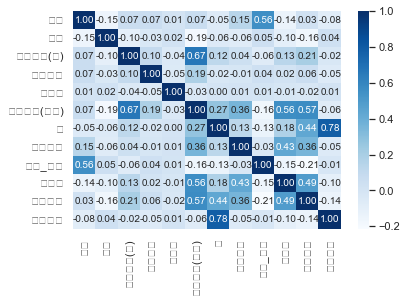

In [32]:
sns.heatmap(data=t.corr(),annot=True,cmap="Blues",fmt='.2f')

In [33]:
plt.rc('font', family='NanumGothic')

## 잡

In [34]:
mapo=pd.read_excel("mapo_2020.xlsx")
t=pd.merge(mapo,x_values,on="단지명",how='left')
t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
t["상대층수"]=t["층"]/t["전체층수"]

In [35]:
from sklearn.utils import shuffle
t=shuffle(t)
t.head()

시군구      번지   본번  부번    단지명  전용면적(㎡)    계약년월  계약일  거래금액(만원)  \
2058   서울특별시 마포구 합정동  389-16  389  16   대운행복   74.050  202003   13     59000   
1052   서울특별시 마포구 성산동     597  597   0   성산동성   60.000  202005   26     58000   
1325  서울특별시 마포구 신공덕동     172  172   0  펜트라우스  115.040  202002   26    147500   
427    서울특별시 마포구 도화동      82   82   0     우성   79.970  202002   26     97000   
448    서울특별시 마포구 도화동      82   82   0     우성  111.725  202009   25    125000   

       층  건축년도       도로명  거리_미터  브랜드  전체층수      상대층수  
2058   3  2004  양화로1길 38    350    0     7  0.428571  
1052   8  1999  모래내로3길 4   1062    0    18  0.444444  
1325   4  2011   백범로 205    141    0    21  0.190476  
427   12  1991    삼개로 38    267    0    15  0.800000  
448    3  1991    삼개로 38    267    0    15  0.200000

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.model_selection import train_test_split

x=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","상대층수"]]
y=t[["거래금액(만원)"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

y_predict=mlr.predict(x_test)

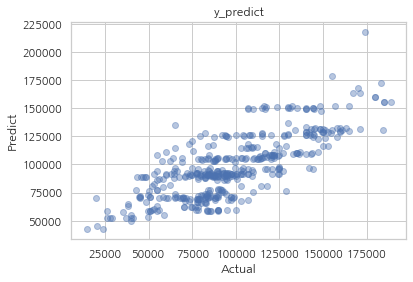

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.title("y_predict")
plt.show()

In [39]:
print(mlr.score(x_train,y_train))

0.638577020505954


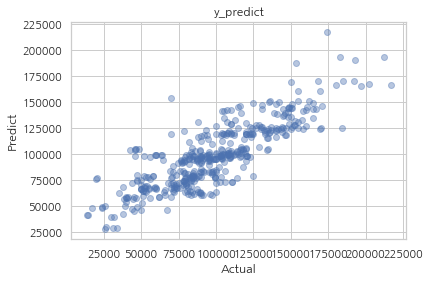

In [40]:
from sklearn.model_selection import train_test_split

x=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","상대층수","시군구"]]
x=pd.get_dummies(x)
y=t[["거래금액(만원)"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

y_predict=mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.title("y_predict")
plt.show()

In [41]:
print(mlr.score(x_train,y_train))

0.7242254116159492


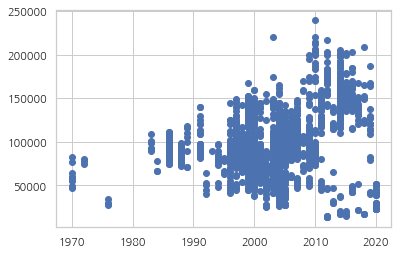

In [42]:
#"전용면적(㎡)","건축년도","거리_미터","브랜드","상대층수"

x=t["건축년도"]
y=t["거래금액(만원)"]
plt.plot(x, y, 'o')
plt.show()

In [43]:
t[(t["전용면적(㎡)"]>100)&(t["거래금액(만원)"]<100000)].시군구.value_counts()

서울특별시 마포구 망원동    16
서울특별시 마포구 중동     11
서울특별시 마포구 도화동     6
서울특별시 마포구 성산동     4
서울특별시 마포구 합정동     3
서울특별시 마포구 공덕동     3
서울특별시 마포구 서교동     3
서울특별시 마포구 상암동     2
서울특별시 마포구 용강동     1
서울특별시 마포구 연남동     1
서울특별시 마포구 동교동     1
서울특별시 마포구 신수동     1
Name: 시군구, dtype: int64

In [44]:
t[(t["전용면적(㎡)"]<100)&(t["거래금액(만원)"]>150000)].시군구.value_counts()

서울특별시 마포구 아현동     32
서울특별시 마포구 공덕동     11
서울특별시 마포구 현석동      9
서울특별시 마포구 대흥동      3
서울특별시 마포구 용강동      2
서울특별시 마포구 신수동      2
서울특별시 마포구 신공덕동     1
서울특별시 마포구 합정동      1
서울특별시 마포구 상수동      1
Name: 시군구, dtype: int64

In [45]:
t[t.상대층수>1]

시군구     번지   본번  부번    단지명  전용면적(㎡)    계약년월  계약일  거래금액(만원)  \
621   서울특별시 마포구 망원동    510  510   0  두영이지안    71.77  202005    5     65700   
1868   서울특별시 마포구 중동  14946   40  12     현대    84.94  202008    1     77000   
1859   서울특별시 마포구 중동  14946   40  12     현대   114.98  202006   13     82500   

       층  건축년도      도로명  거리_미터  브랜드  전체층수      상대층수  
621   11  2004  방울내로 36    598    0     9  1.222222  
1868  16  2000  성암로7길 3    530    0    15  1.066667  
1859  17  2000  성암로7길 3    530    0    15  1.133333

In [46]:
x_values[x_values.단지명=="현대"] #두영이지안, 현대 수정 필요

단지명  거리_미터  브랜드  전체층수
138  현대    530    0    15

In [47]:
t.groupby("시군구")["거래금액(만원)"].mean().to_frame()

거래금액(만원)
시군구                          
서울특별시 마포구 공덕동    99045.458515
서울특별시 마포구 노고산동   28696.666667
서울특별시 마포구 대흥동    98687.500000
서울특별시 마포구 도화동    95705.159817
서울특별시 마포구 동교동    75250.000000
서울특별시 마포구 마포동    67469.117647
서울특별시 마포구 망원동    63391.818182
서울특별시 마포구 상수동   138038.235294
서울특별시 마포구 상암동    93832.920792
서울특별시 마포구 서교동   112629.661017
서울특별시 마포구 성산동    79549.090909
서울특별시 마포구 신공덕동  112113.503650
서울특별시 마포구 신수동    94329.207921
서울특별시 마포구 신정동   104775.000000
서울특별시 마포구 아현동   129651.785714
서울특별시 마포구 연남동    78289.230769
서울특별시 마포구 염리동   104969.841270
서울특별시 마포구 용강동   127144.117647
서울특별시 마포구 중동     76351.428571
서울특별시 마포구 창전동   100097.972973
서울특별시 마포구 토정동    96878.947368
서울특별시 마포구 하중동   192117.647059
서울특별시 마포구 합정동    96919.512195
서울특별시 마포구 현석동   112599.065421

## 지역변수

In [48]:
with_locals=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","상대층수","시군구"]]
with_locals=pd.get_dummies(with_locals)
with_locals

전용면적(㎡)  건축년도  거리_미터  브랜드      상대층수  시군구_서울특별시 마포구 공덕동  \
2058   74.0500  2004    350    0  0.428571                  0   
1052   60.0000  1999   1062    0  0.444444                  0   
1325  115.0400  2011    141    0  0.190476                  0   
427    79.9700  1991    267    0  0.800000                  0   
448   111.7250  1991    267    0  0.200000                  0   
...        ...   ...    ...  ...       ...                ...   
1867  114.9800  2000    530    0  0.133333                  0   
372    59.4000  1998    417    0  0.411765                  0   
788    84.8900  2010   1450    0  0.733333                  0   
1468   84.5978  2014    437    1  0.400000                  0   
670    65.3500  2004    637    0  0.846154                  0   

      시군구_서울특별시 마포구 노고산동  시군구_서울특별시 마포구 대흥동  시군구_서울특별시 마포구 도화동  \
2058                   0                  0                  0   
1052                   0                  0                  0   
1325                   0                  0                  0   
427                    0                  0                  1   
448                    0                  0                  1   
...                  ...                ...                ...   
1867                   0                  0                  0   
372                    0                  0                  1   
788                    0                  0                  0   
1468                   0                  0                  0   
670                    0                  0                  0   

      시군구_서울특별시 마포구 동교동  ...  시군구_서울특별시 마포구 아현동  시군구_서울특별시 마포구 연남동  \
2058                  0  ...                  0                  0   
1052                  0  ...                  0                  0   
1325                  0  ...                  0                  0   
427                   0  ...                  0                  0   
448                   0  ...                  0                  0   
...                 ...  ...                ...                ...   
1867                  0  ...                  0                  0   
372                   0  ...                  0                  0   
788                   0  ...                  0                  0   
1468                  0  ...                  1                  0   
670                   0  ...                  0                  0   

      시군구_서울특별시 마포구 염리동  시군구_서울특별시 마포구 용강동  시군구_서울특별시 마포구 중동  \
2058                  0                  0                 0   
1052                  0                  0                 0   
1325                  0                  0                 0   
427                   0                  0                 0   
448                   0                  0                 0   
...                 ...                ...               ...   
1867                  0                  0                 1   
372                   0                  0                 0   
788                   0                  0                 0   
1468                  0                  0                 0   
670                   0                  0                 0   

      시군구_서울특별시 마포구 창전동  시군구_서울특별시 마포구 토정동  시군구_서울특별시 마포구 하중동  \
2058                  0                  0                  0   
1052                  0                  0                  0   
1325                  0                  0                  0   
427                   0                  0                  0   
448                   0                  0                  0   
...                 ...                ...                ...   
1867                  0                  0                  0   
372                   0                  0                  0   
788                   0                  0                  0   
1468                  0                  0                  0   
670                   0                  0                  0   

      시군구_서울특별시 마포구 합정동  시군구_서울특별시 마포구 현석동

In [49]:
x=with_locals
y=t[["거래금액(만원)"]]
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:19:46   Log-Likelihood:                -24809.
No. Observations:                2203   AIC:                         4.968e+04
Df Residuals:                    2174   BIC:                         4.984e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -6.93e+05   1.17e+05     -5.913      0.000   -9.23e+05   -4.63e+05
전용면적(㎡)              817.3425     17.420     46.921      0.000     783.182     851.503
건축년도                 374.0432     60.961      6.136      0.000     254.495     493.591
거리_미터                 -9.0696      2.008     -4.516      0.000     -13.008      -5.131
브랜드                 2.636e+04   1289.143     20.444      0.000    2.38e+04    2.89e+04
상대층수                4241.3421   1528.051      2.776      0.006    1244.749    7237.935
시군구_서울특별시 마포구 공덕동  -2.568e+04   5210.324     -4.930      0.000   -3.59e+04   -1.55e+04
시군구_서울특별시 마포구 노고산동 -5.477e+04   6967.275     -7.861      0.000   -6.84e+04   -4.11e+04
시군구_서울특별시 마포구 대흥동  -1.679e+04   5333.997     -3.148      0.002   -2.72e+04   -6329.391
시군구_서울특별시 마포구 도화동  -2.414e+04   4894.512     -4.933      0.000   -3.37e+04   -1.45e+04
시군구_서울특별시 마포구 동교동   -6.48e+04   1.38e+04     -4.680      0.000   -9.19e+04   -3.76e+04
시군구_서울특별시 마포구 마포동  -3.417e+04   5755.713     -5.937      0.000   -4.55e+04   -2.29e+04
시군구_서울특별시 마포구 망원동  -5.356e+04   5192.518    -10.314      0.000   -6.37e+04   -4.34e+04
시군구_서울특별시 마포구 상수동   -1.93e+04   6112.739     -3.157      0.002   -3.13e+04   -7312.437
시군구_서울특별시 마포구 상암동  -2.051e+04   5412.355     -3.789      0.000   -3.11e+04   -9892.539
시군구_서울특별시 마포구 서교동  -4.372e+04   5744.961     -7.609      0.000    -5.5e+04   -3.24e+04
시군구_서울특별시 마포구 성산동  -2.678e+04   4659.663     -5.747      0.000   -3.59e+04   -1.76e+04
시군구_서울특별시 마포구 신공덕동 -2.796e+04   5184.340     -5.392      0.000   -3.81e+04   -1.78e+04
시군구_서울특별시 마포구 신수동  -2.581e+04   5302.913     -4.867      0.000   -3.62e+04   -1.54e+04
시군구_서울특별시 마포구 신정동  -1.885e+04   6063.975     -3.109      0.002   -3.07e+04   -6961.086
시군구_서울특별시 마포구 아현동  -1.037e+04   5426.496     -1.911      0.056    -2.1e+04     273.668
시군구_서울특별시 마포구 연남동  -3.844e+04   5747.775     -6.687      0.000   -4.97e+04   -2.72e+04
시군구_서울특별시 마포구 염리동  -2.358e+04   5249.007     -4.491      0.000   -3.39e+04   -1.33e+04
시군구_서울특별시 마포구 용강동  -1.181e+04   5917.739     -1.996      0.046   -2.34e+04    -206.804
시군구_서울특별시 마포구 중동   -4.164e+04   5193.255     -8.018      0.000   -5.18e+04   -3.15e+04
시군구_서울특별시 마포구 창전동  -3.055e+04   5186.037     -5.891      0.000   -4.07e+04   -2.04e+04
시군구_서울특별시 마포구 토정동  -7026.8111   6239.531     -1.126      0.260   -1.93e+04    5209.256
시군구_서울특별시 마포구 하중동  -4919.9463   6949.562     -0.708      0.479   -1.85e+04    8708.533
시군구_서울특별시 마포구 합정동  -4.022e+04   5937.186     -6.774      0.000   -5.19e+04   -2.86e+04
시군구_서울특별시 마포구 현석동  -2.766e+04   5062.407     -5.464      0.000   -3.76e+04   -1.77e+04
==============================================================================
Omnibus:                      111.866   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (J

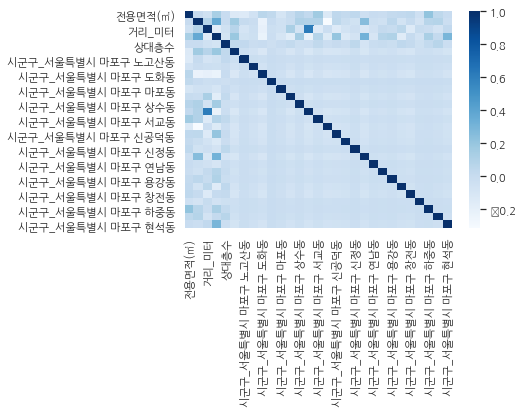

In [50]:
sns.heatmap(data=with_locals.corr(),cmap="Blues")

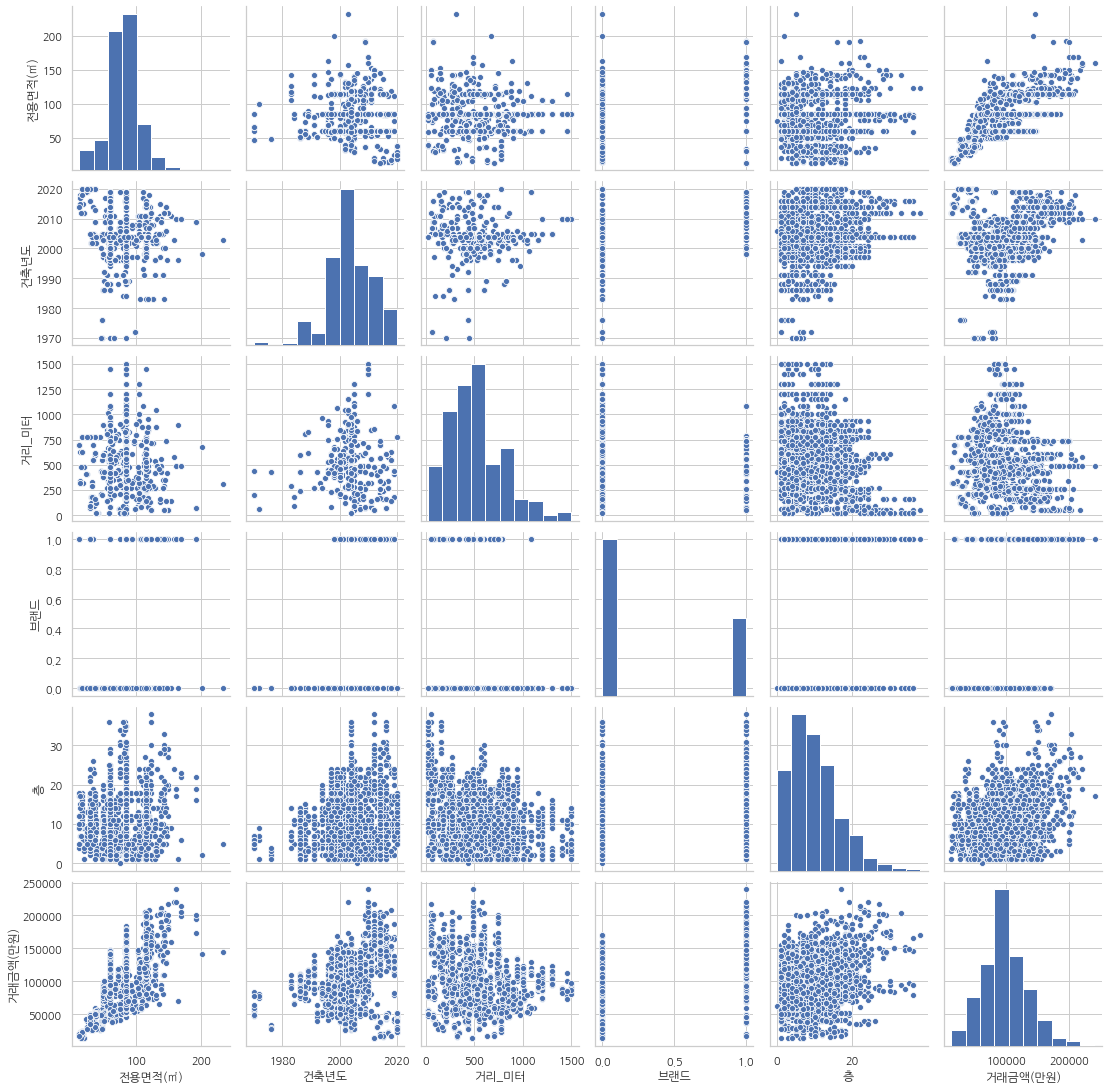

In [51]:
sns.pairplot(t[["전용면적(㎡)","건축년도","거리_미터","브랜드","층","시군구","거래금액(만원)"]])

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_set=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","층"]]

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_set.values, i) for i in range(x_set.shape[1])]
vif["features"]=x_set.columns
vif

VIF Factor features
0   10.235609  전용면적(㎡)
1   16.520925     건축년도
2    4.552166    거리_미터
3    1.603212      브랜드
4    3.594752        층

In [53]:
with_locals=t[["전용면적(㎡)","거리_미터","브랜드","층","시군구"]]
with_locals=pd.get_dummies(with_locals) #"시군구" 
x=with_locals
y=t[["거래금액(만원)"]]
model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:19:54   Log-Likelihood:                -24760.
No. Observations:                2203   AIC:                         4.958e+04
Df Residuals:                    2175   BIC:                         4.974e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
전용면적(㎡)              796.6078     16.993     46.879      0.000     763.284     829.932
거리_미터                 -5.3598      1.974     -2.716      0.007      -9.230      -1.489
브랜드                 2.621e+04   1227.795     21.346      0.000    2.38e+04    2.86e+04
층                    799.2980     65.787     12.150      0.000     670.287     928.309
시군구_서울특별시 마포구 공덕동   2.558e+04   2233.428     11.452      0.000    2.12e+04       3e+04
시군구_서울특별시 마포구 노고산동 -3166.2981   4880.252     -0.649      0.517   -1.27e+04    6404.146
시군구_서울특별시 마포구 대흥동   3.199e+04   2723.381     11.746      0.000    2.66e+04    3.73e+04
시군구_서울특별시 마포구 도화동   2.452e+04   2109.139     11.626      0.000    2.04e+04    2.87e+04
시군구_서울특별시 마포구 동교동  -7730.2951   1.32e+04     -0.584      0.559   -3.37e+04    1.82e+04
시군구_서울특별시 마포구 마포동    1.61e+04   3488.219      4.614      0.000    9254.833    2.29e+04
시군구_서울특별시 마포구 망원동   -650.5059   2394.671     -0.272      0.786   -5346.587    4045.576
시군구_서울특별시 마포구 상수동   3.381e+04   3775.562      8.955      0.000    2.64e+04    4.12e+04
시군구_서울특별시 마포구 상암동   2.937e+04   2963.625      9.910      0.000    2.36e+04    3.52e+04
시군구_서울특별시 마포구 서교동   6684.4440   3161.841      2.114      0.035     483.900    1.29e+04
시군구_서울특별시 마포구 성산동   2.156e+04   2152.097     10.019      0.000    1.73e+04    2.58e+04
시군구_서울특별시 마포구 신공덕동  2.235e+04   2415.008      9.253      0.000    1.76e+04    2.71e+04
시군구_서울특별시 마포구 신수동   2.461e+04   2532.832      9.718      0.000    1.96e+04    2.96e+04
시군구_서울특별시 마포구 신정동   2.723e+04   4261.415      6.391      0.000    1.89e+04    3.56e+04
시군구_서울특별시 마포구 아현동   4.219e+04   2342.143     18.015      0.000    3.76e+04    4.68e+04
시군구_서울특별시 마포구 연남동   1.397e+04   3379.162      4.133      0.000    7339.408    2.06e+04
시군구_서울특별시 마포구 염리동   2.541e+04   3008.013      8.448      0.000    1.95e+04    3.13e+04
시군구_서울특별시 마포구 용강동    4.03e+04   3728.267     10.810      0.000     3.3e+04    4.76e+04
시군구_서울특별시 마포구 중동    6774.9800   2687.494      2.521      0.012    1504.655     1.2e+04
시군구_서울특별시 마포구 창전동   2.104e+04   2269.979      9.267      0.000    1.66e+04    2.55e+04
시군구_서울특별시 마포구 토정동   3.913e+04   4592.643      8.520      0.000    3.01e+04    4.81e+04
시군구_서울특별시 마포구 하중동   4.591e+04   5312.814      8.641      0.000    3.55e+04    5.63e+04
시군구_서울특별시 마포구 합정동    1.06e+04   3430.244      3.089      0.002    3870.594    1.73e+04
시군구_서울특별시 마포구 현석동   2.061e+04   2772.869      7.434      0.000    1.52e+04    2.61e+04
==============================================================================
Omnibus:                       70.373   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.084
Skew:                          -0.359   Prob(JB):                     2.74e-20
Kurtosis:                       3.682   Cond. No.                     

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(with_locals.values, i) for i in range(with_locals.shape[1])]
vif["features"]=with_locals.columns
vif

VIF Factor            features
0     1.218522             전용면적(㎡)
1     2.077133               거리_미터
2     2.146483                 브랜드
3     1.134599                   층
4     3.330001   시군구_서울특별시 마포구 공덕동
5     1.041455  시군구_서울특별시 마포구 노고산동
6     1.643217   시군구_서울특별시 마포구 대흥동
7     2.840006   시군구_서울특별시 마포구 도화동
8     1.020193   시군구_서울특별시 마포구 동교동
9     1.206011   시군구_서울특별시 마포구 마포동
10    2.758292   시군구_서울특별시 마포구 망원동
11    1.412885   시군구_서울특별시 마포구 상수동
12    5.172048   시군구_서울특별시 마포구 상암동
13    1.719478   시군구_서울특별시 마포구 서교동
14    2.227779   시군구_서울특별시 마포구 성산동
15    2.329283  시군구_서울특별시 마포구 신공덕동
16    1.888856   시군구_서울특별시 마포구 신수동
17    1.270526   시군구_서울특별시 마포구 신정동
18    2.686587   시군구_서울특별시 마포구 아현동
19    1.298218   시군구_서울특별시 마포구 연남동
20    1.661747   시군구_서울특별시 마포구 염리동
21    1.377710   시군구_서울특별시 마포구 용강동
22    2.210799    시군구_서울특별시 마포구 중동
23    2.223158   시군구_서울특별시 마포구 창전동
24    1.168272   시군구_서울특별시 마포구 토정동
25    1.398823   시군구_서울특별시 마포구 하중동
26    1.406367   시군구_서울특별시 마포구 합정동
27    2.398320   시군구_서울특별시 마포구 현석동

In [55]:
#resid

In [56]:
#월별 시간 가중치를 줘야하나?